In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
__file__ = './'
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

# os.path.dirname(__file__)获取当前文件的绝对路径
# os.path.join(xx,'..')在后面追加..，相当于进入上一级目录
# os.path.abspath(xx)获取绝对路径
# sys.path.append()将其加入系统路径当中

import MSA
import LINK

In [2]:
# read data
my_link = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='link_info')
my_link['I'] = 0
my_node = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='node_info')
my_link['name'] = my_link['from'].astype('str') +'-'+ my_link['to'].astype('str')
my_demand = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='demand_info')
print(my_demand)


# set parameter
origin_zone = ['r1','r2']
destination_zone = ['s1','s2']
theta_1 = 1 # path 
theta_2 = 0.5 # mode
miu_in = 25
miu_out = 50
lamda_0_hailing = 2 #2 RMB/minute
lamda_0_PR = 30 # RMB
lamda_0_transit = 5
N_hailing = 2000
lamda_0_auto = LINK.compute_lamda_0_auto(fuel_consumption=8.5)

df = []
demand_level = np.arange(0.5, 5.1, 0.25)
demand_list = [np.array(my_demand['demand']) *level for level in demand_level]
for demand in demand_list:
    my_demand['demand'] = demand
    result = MSA.assignment(my_link= my_link, my_node= my_node, my_demand= my_demand,
                        origin_zone= origin_zone, destination_zone= destination_zone,
                        miu_in= miu_in, miu_out= miu_out,
                        lamda_0_auto= lamda_0_auto,
                        lamda_0_hailing= lamda_0_hailing,
                        lamda_0_transit= lamda_0_transit,
                        lamda_0_PR= lamda_0_PR,
                        theta_1= theta_1, theta_2= theta_2,
                        N_hailing= N_hailing, A=2, maximum_iter=300)
    df.append(result)

# system cost
total_cost = []
for item in df:
    flow_set = item[2].tail(item[6])
    cost = sum(abs(flow_set['path_cost']) * flow_set['path_flow'])
    total_cost.append(cost)

# OD cost
def od_cost(path, od):
    cost = sum(abs(path[path['OD_pair'] == od]['path_cost']) * path[path['OD_pair'] == od]['path_flow']) / sum(path[path['OD_pair'] == od]['path_flow'])
    return cost

od_1_cost = []
od_2_cost = []
od_3_cost = []
od_4_cost = []
for i in range(len(df)):
    flow_set = df[i][2].tail(df[i][6])
    od_1_cost.append(od_cost(flow_set, 'r1-s1'))
    od_2_cost.append(od_cost(flow_set, 'r1-s2'))
    od_3_cost.append(od_cost(flow_set, 'r2-s1'))
    od_4_cost.append(od_cost(flow_set, 'r2-s2'))

# mode share
PR_logit = [df[i][4].tail(df[i][7]).iloc[0]['mode_logit'] for i in range(len(df))]
RT_logit = [df[i][4].tail(df[i][7]).iloc[1]['mode_logit'] for i in range(len(df))]
auto_logit = [df[i][4].tail(df[i][7]).iloc[2]['mode_logit'] for i in range(len(df))]
bus_logit = [df[i][4].tail(df[i][7]).iloc[3]['mode_logit'] for i in range(len(df))]

# ride-hailing vehicle number
n_idle = [df[i][5].tail(1).iloc[0]['n_idle'] for i in range(len(df))]
waiting_hailing = [df[i][5].tail(1).iloc[0]['wait_time'] for i in range(len(df))]

# convert to dataframe
dfx = pd.DataFrame({
        'demand': demand_level,
        'n_idle': n_idle,
        'waiting time': waiting_hailing,
        'od_1_cost': od_1_cost,
        'od_2_cost': od_2_cost,
        'od_3_cost': od_3_cost,
        'od_4_cost': od_4_cost,
        'total_cost': total_cost,
        'auto_logit': auto_logit,
        'bus_logit': bus_logit,
        'PR_logit': PR_logit,
        'RT_logit': RT_logit,})

  OD_pair  demand
0   r1-s1    2000
1   r1-s2    1500
2   r2-s1    1200
3   r2-s2    1000
0.6517
['path-1', 'path-2', 'path-3', 'path-4', 'path-5', 'path-6', 'path-7', 'path-8', 'path-9', 'path-10', 'path-11', 'path-12', 'path-13', 'path-14', 'path-15', 'path-16', 'path-17', 'path-18', 'path-19', 'path-20', 'path-21', 'path-22', 'path-23', 'path-24', 'path-25', 'path-26', 'path-27', 'path-28', 'path-29', 'path-30', 'path-31', 'path-32', 'path-33', 'path-34', 'path-35', 'path-36', 'path-37', 'path-38', 'path-39', 'path-40', 'path-41', 'path-42', 'path-43', 'path-44', 'path-45', 'path-46', 'path-47', 'path-48', 'path-49', 'path-50', 'path-51', 'path-52', 'path-53', 'path-54', 'path-55', 'path-56', 'path-57', 'path-58', 'path-59', 'path-60', 'path-61', 'path-62', 'path-63', 'path-64', 'path-65', 'path-66']
['auto', 'auto', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'P&R', 'transit', 'R&T', 'R&T', 'R&T', 'R&T', 'R&T', 'auto', 'auto', 'auto', 'auto

In [3]:
dfx

,demand,n_idle,waiting time,od_1_cost,od_2_cost,od_3_cost,od_4_cost,total_cost,auto_logit,bus_logit,PR_logit,RT_logit
0,0.50,1888.102795,15.962019,160.267867,145.510364,141.684984,138.848941,1.076940e+05,0.326011,0.224072,0.190575,0.259342
1,0.75,1831.424102,16.174095,164.420223,149.879133,143.150014,141.839665,1.644505e+05,0.325953,0.224432,0.189704,0.259911
2,1.00,1773.710798,16.399454,171.842389,157.679399,146.108336,147.397107,2.262329e+05,0.325406,0.225245,0.188226,0.261123
3,1.25,1714.875120,16.639725,181.895943,168.385394,151.006033,155.629833,2.952172e+05,0.324360,0.226347,0.186615,0.262678
4,1.50,1654.765663,16.897073,194.384388,181.708274,158.705964,166.848624,3.744565e+05,0.322445,0.227803,0.185284,0.264469
5,1.75,1593.037527,17.174922,209.925008,198.058673,170.450891,181.761862,4.690217e+05,0.319117,0.229832,0.184529,0.266522
6,2.00,1529.660904,17.475817,229.719515,218.382830,187.681702,201.311277,5.862919e+05,0.313972,0.232537,0.184815,0.268676
7,2.25,1465.413436,17.798588,255.445558,244.063063,212.086763,226.628315,7.363578e+05,0.306762,0.235811,0.186970,0.270457
8,2.50,1401.988423,18.136558,289.429778,277.059296,246.007037,259.286893,9.335279e+05,0.297259,0.239419,0.192120,0.271202
9,2.75,1341.618712,18.477978,334.904809,320.141965,292.894552,301.614534,1.198734e+06,0.285387,0.243099,0.201205,0.270309


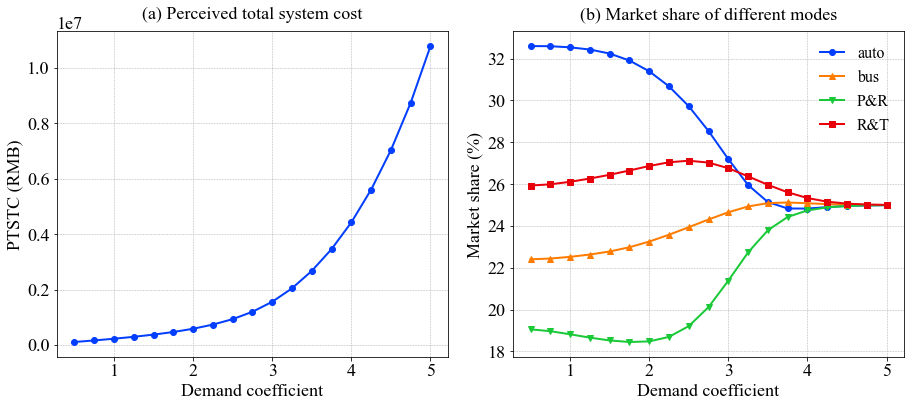

In [4]:
import seaborn as sns
sns.set_palette("bright", 10)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(13,6))
markers = ['o','^','v','s','h','D','p','<','>']

ax = plt.subplot(1,2,1)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['demand'], dfx['total_cost'], '-', lw=2, marker='o')
ax.set_xlabel('Demand coefficient')
ax.set_ylabel('PTSTC (RMB)')
ax.set_title('(a) Perceived total system cost', fontsize=18, loc='center', y=1.02)

ax = plt.subplot(1,2,2)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['demand'], dfx['auto_logit']*100, '-', lw=2, marker=markers[0], label='auto')
ax.plot(dfx['demand'], dfx['bus_logit']*100, '-', lw=2, marker=markers[1], label='bus')
ax.plot(dfx['demand'], dfx['PR_logit']*100, '-', lw=2, marker=markers[2], label='P&R')
ax.plot(dfx['demand'], dfx['RT_logit']*100, '-', lw=2, marker=markers[3], label='R&T')
ax.set_xlabel('Demand coefficient')
ax.set_ylabel('Market share (%)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5) #, bbox_to_anchor=(0.7,0.7)
ax.set_title('(b) Market share of different modes', fontsize=18, loc='center', y=1.02,)

plt.tight_layout()
plt.show()

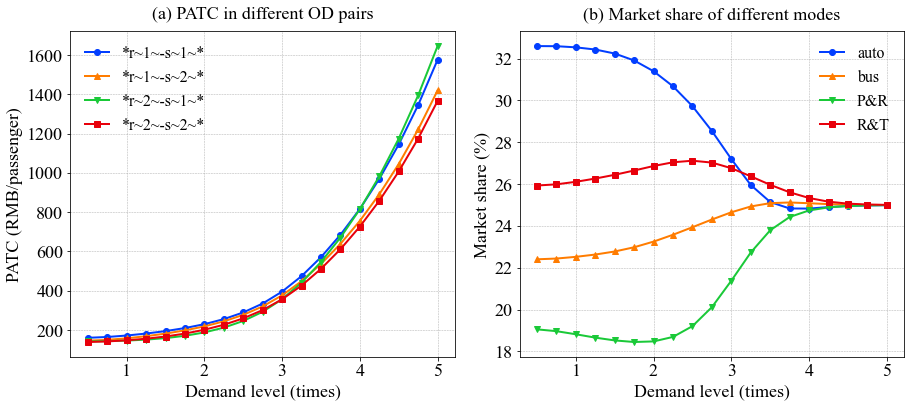

In [5]:
import seaborn as sns
sns.set_palette("bright", 10)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(13,6))
markers = ['o','^','v','s','h','D','p','<','>']

ax = plt.subplot(1,2,1)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['demand'], dfx['od_1_cost'], '-', lw=2, marker=markers[0], label='*r~1~-s~1~*')
ax.plot(dfx['demand'], dfx['od_2_cost'], '-', lw=2, marker=markers[1], label='*r~1~-s~2~*')
ax.plot(dfx['demand'], dfx['od_3_cost'], '-', lw=2, marker=markers[2], label='*r~2~-s~1~*')
ax.plot(dfx['demand'], dfx['od_4_cost'], '-', lw=2, marker=markers[3], label='*r~2~-s~2~*')
ax.set_xlabel('Demand level (times)')
ax.set_ylabel('PATC (RMB/passenger)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5)
ax.set_title('(a) PATC in different OD pairs', fontsize=18, loc='center', y=1.02)

ax = plt.subplot(1,2,2)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['demand'], dfx['auto_logit']*100, '-', lw=2, marker=markers[0], label='auto')
ax.plot(dfx['demand'], dfx['bus_logit']*100, '-', lw=2, marker=markers[1], label='bus')
ax.plot(dfx['demand'], dfx['PR_logit']*100, '-', lw=2, marker=markers[2], label='P&R')
ax.plot(dfx['demand'], dfx['RT_logit']*100, '-', lw=2, marker=markers[3], label='R&T')
ax.set_xlabel('Demand level (times)')
ax.set_ylabel('Market share (%)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5) #, bbox_to_anchor=(0.7,0.7)
ax.set_title('(b) Market share of different modes', fontsize=18, loc='center', y=1.02,)

plt.tight_layout()
plt.show()

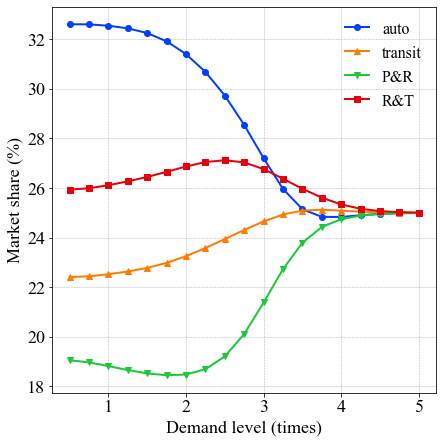

In [7]:
import seaborn as sns
sns.set_palette("bright", 10)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(6.5,6.5))
markers = ['o','^','v','s','h','D','p','<','>']

# ax = plt.subplot(1,1,1)
# ax.grid(ls = '--', lw = 0.5, zorder = 0)
# ax.plot(dfx['demand'], dfx['od_1_cost'], '-', lw=2, marker=markers[0], label='*r~1~-s~1~*')
# ax.plot(dfx['demand'], dfx['od_2_cost'], '-', lw=2, marker=markers[1], label='*r~1~-s~2~*')
# ax.plot(dfx['demand'], dfx['od_3_cost'], '-', lw=2, marker=markers[2], label='*r~2~-s~1~*')
# ax.plot(dfx['demand'], dfx['od_4_cost'], '-', lw=2, marker=markers[3], label='*r~2~-s~2~*')
# ax.set_xlabel('Demand level (times)')
# ax.set_ylabel('PATC (RMB/passenger)')
# ax.set_title('(a) PATC in different OD pairs', fontsize=18, loc='center', y=1.02)

ax = plt.subplot(1,1,1)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['demand'], dfx['auto_logit']*100, '-', lw=2, marker=markers[0], label='auto')
ax.plot(dfx['demand'], dfx['bus_logit']*100, '-', lw=2, marker=markers[1], label='transit')
ax.plot(dfx['demand'], dfx['PR_logit']*100, '-', lw=2, marker=markers[2], label='P&R')
ax.plot(dfx['demand'], dfx['RT_logit']*100, '-', lw=2, marker=markers[3], label='R&T')
ax.set_xlabel('Demand level (times)')
ax.set_ylabel('Market share (%)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5) #, bbox_to_anchor=(0.7,0.7)
#ax.set_title('(b) Market share of different modes', fontsize=18, loc='center', y=1.02,)

plt.tight_layout()
plt.show()